In [47]:
import pandas as pd
from string import punctuation
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
pd.options.display.max_colwidth = 100

In [12]:
df = pd.read_csv('./data/new_all_nl.tsv', sep='\t', header=None, names=['labels','text'])

In [13]:
df.sample(5)

,labels,text
820,198,how is life at home
2834,138,have a good day!
1453,28,how is your emotional health
3404,101,any other symptoms youve noticed
2805,217,how much do you take and how often


In [14]:
def decapitalize(string_):
    return string_.lower()

In [15]:
df['text'] = df['text'].apply(decapitalize)

In [16]:
df.sample(5)

,labels,text
1315,301,"what about yourself, what is your medical history"
6173,260,im glad
1172,291,what do you like to do for fun
4393,266,how about your grandparents?
5288,216,how many hours each week ddo you work?


In [27]:
def remove_punctuations(string_):
    return ''.join(c for c in string_ if c not in punctuation)

In [28]:
df['text'] = df['text'].apply(remove_punctuations)

In [34]:
df.sample(5)

,labels,text
2383,278,now i want to talk about your past medical history
4820,10,anything else
4288,324,where do you work
4902,107,do you have any medical issues
4049,157,have you ever had an sti


In [36]:
def split_words(string_):
    return string_.split(' ')

In [37]:
df['split'] = df['text'].apply(split_words)

In [38]:
df.sample(5)

,labels,text,split
5197,33,have your grandparents passed away,"[have, your, grandparents, passed, away]"
612,228,okay now i am going to ask you a couple questions about your medical history,"[okay, now, i, am, going, to, ask, you, a, couple, questions, about, your, medical, history]"
2080,286,what brings you in today,"[what, brings, you, in, today]"
6096,10,so you have told me that you have a dull ache in your lower back that started wwhen you lifeted ...,"[so, you, have, told, me, that, you, have, a, dull, ache, in, your, lower, back, that, started, ..."
4918,289,ok so lets talk about this back pain what concerns you,"[ok, so, lets, talk, about, this, back, pain, what, concerns, you]"


In [45]:
num_class = len(set(df['labels'].data))
num_class

c:\users\song\pyvenvs\venv_twitter\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Series.data is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


334

In [62]:
def horizontal_line(y):
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()
    l = mlines
def ranked_class_density(labels):
    num_class = len(set(labels.data))
    class_count = [0]*num_class
    for i in labels.data:
        class_count[i] +=1
    class_count_ = []
    for i in range(num_class):
        class_count_.append((i, class_count[i]))
    class_count_.sort(key=lambda x:x[1], reverse=True)
    classes = [i[0] for i in class_count_]
    counts = [i[1] for i in class_count_]
    median = np.median(counts)
    minority = 0
    print('median'+str(np.median(counts)))
    for i in counts:
        if i < median:
            minority +=1
    print(minority)
    plt.plot(counts)
    plt.show()

c:\users\song\pyvenvs\venv_twitter\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Series.data is deprecated and will be removed in a future version
  
c:\users\song\pyvenvs\venv_twitter\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Series.data is deprecated and will be removed in a future version
  


median7.0
166


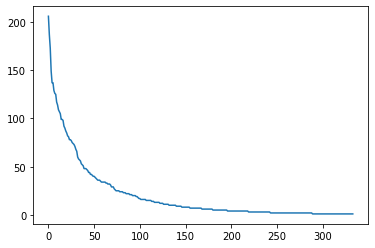

In [63]:
ranked_class_density(df['labels'])

In [57]:
print(df.shape)


(6827, 3)
